In [1]:
print("Hello, world!")

Hello, world!


In [2]:
# Boston House Price Prediction - Linear Regression Model Training
# Save this as: boston_house_price_model.ipynb

import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

# Load the Boston Housing dataset
print("Loading Boston Housing Dataset...")
boston = load_boston(BostonHousing.csv)
X = boston.data
y = boston.target
feature_names = boston.feature_names

# Create DataFrame for better understanding
df = pd.DataFrame(X, columns=feature_names)
df['PRICE'] = y

print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# Statistical summary
print("\nStatistical Summary:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Correlation analysis
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Boston Housing Features')
plt.tight_layout()
plt.show()

# Feature importance analysis - correlation with target
feature_correlation = df.corr()['PRICE'].sort_values(ascending=False)
print("\nFeature Correlation with Price:")
print(feature_correlation)

# Visualize some key relationships
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# RM (average number of rooms) vs PRICE
axes[0,0].scatter(df['RM'], df['PRICE'], alpha=0.6)
axes[0,0].set_xlabel('Average Number of Rooms (RM)')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms vs Price')

# LSTAT (% lower status of population) vs PRICE
axes[0,1].scatter(df['LSTAT'], df['PRICE'], alpha=0.6)
axes[0,1].set_xlabel('% Lower Status of Population (LSTAT)')
axes[0,1].set_ylabel('Price')
axes[0,1].set_title('LSTAT vs Price')

# CRIM (crime rate) vs PRICE
axes[1,0].scatter(df['CRIM'], df['PRICE'], alpha=0.6)
axes[1,0].set_xlabel('Crime Rate (CRIM)')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Crime Rate vs Price')

# DIS (distance to employment centers) vs PRICE
axes[1,1].scatter(df['DIS'], df['PRICE'], alpha=0.6)
axes[1,1].set_xlabel('Distance to Employment Centers (DIS)')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Distance vs Price')

plt.tight_layout()
plt.show()

# Split the data
print("\nSplitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# Create and train the Linear Regression model
print("\nTraining Linear Regression Model...")
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\n" + "="*50)
print("MODEL PERFORMANCE METRICS")
print("="*50)
print(f"Training Set:")
print(f"  MSE: {train_mse:.4f}")
print(f"  RMSE: {train_rmse:.4f}")
print(f"  MAE: {train_mae:.4f}")
print(f"  R² Score: {train_r2:.4f}")

print(f"\nTesting Set:")
print(f"  MSE: {test_mse:.4f}")
print(f"  RMSE: {test_rmse:.4f}")
print(f"  MAE: {test_mae:.4f}")
print(f"  R² Score: {test_r2:.4f}")

# Feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print("\n" + "="*50)
print("FEATURE IMPORTANCE (Coefficients)")
print("="*50)
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Linear Regression Feature Coefficients')
plt.tight_layout()
plt.show()

# Prediction vs Actual plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Training set
ax1.scatter(y_train, y_train_pred, alpha=0.6)
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Price')
ax1.set_ylabel('Predicted Price')
ax1.set_title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.4f}')

# Testing set
ax2.scatter(y_test, y_test_pred, alpha=0.6)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_xlabel('Actual Price')
ax2.set_ylabel('Predicted Price')
ax2.set_title(f'Testing Set: Actual vs Predicted\nR² = {test_r2:.4f}')

plt.tight_layout()
plt.show()

# Residual plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Training residuals
train_residuals = y_train - y_train_pred
ax1.scatter(y_train_pred, train_residuals, alpha=0.6)
ax1.axhline(y=0, color='r', linestyle='--')
ax1.set_xlabel('Predicted Price')
ax1.set_ylabel('Residuals')
ax1.set_title('Training Set: Residual Plot')

# Testing residuals
test_residuals = y_test - y_test_pred
ax2.scatter(y_test_pred, test_residuals, alpha=0.6)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('Predicted Price')
ax2.set_ylabel('Residuals')
ax2.set_title('Testing Set: Residual Plot')

plt.tight_layout()
plt.show()

# Save the model
print("\nSaving the trained model...")
with open('boston_house_price_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as 'boston_house_price_model.pkl'")

# Test the saved model
print("\nTesting the saved model...")
with open('boston_house_price_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Test prediction with the loaded model
sample_prediction = loaded_model.predict(X_test[:5])
print(f"\nSample predictions from loaded model:")
for i in range(5):
    print(f"Actual: {y_test[i]:.2f}, Predicted: {sample_prediction[i]:.2f}")

print("\n" + "="*50)
print("MODEL TRAINING COMPLETED SUCCESSFULLY!")
print("="*50)
print(f"Final Model Performance (Test Set):")
print(f"R² Score: {test_r2:.4f} ({test_r2*100:.2f}%)")
print(f"RMSE: {test_rmse:.4f}")
print(f"The model explains {test_r2*100:.2f}% of the variance in house prices.")

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


Loading California Housing dataset...


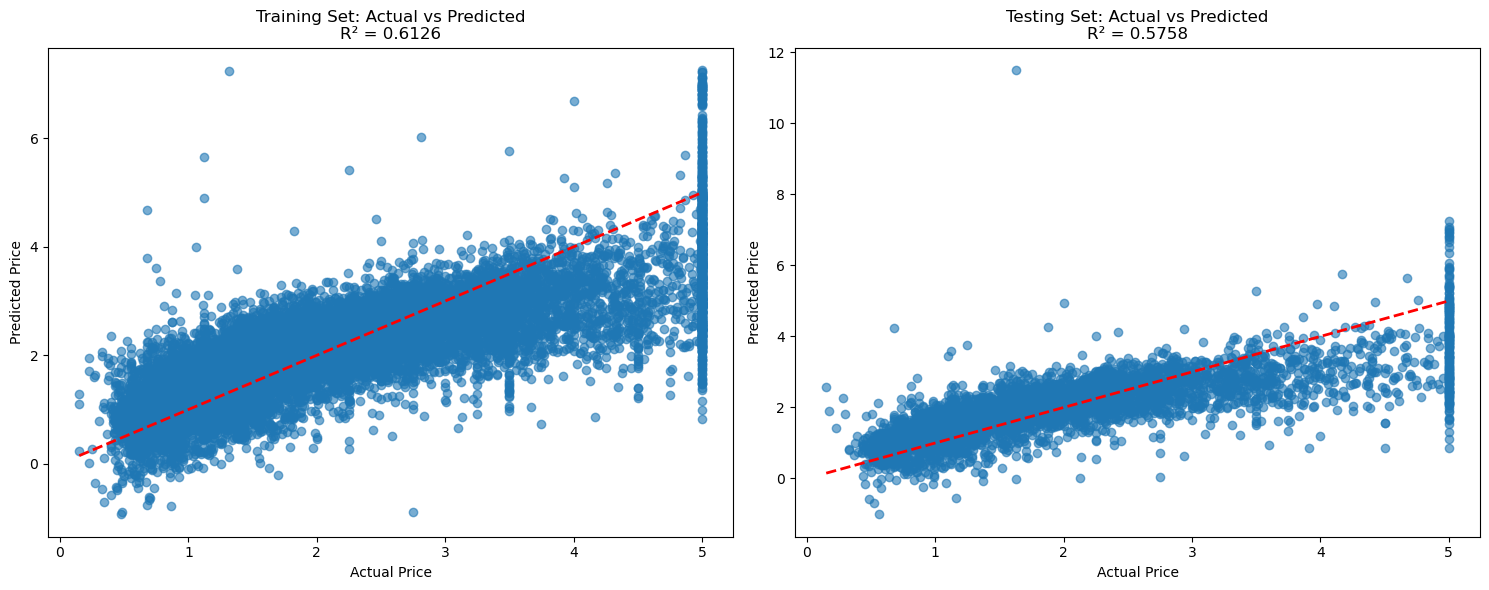

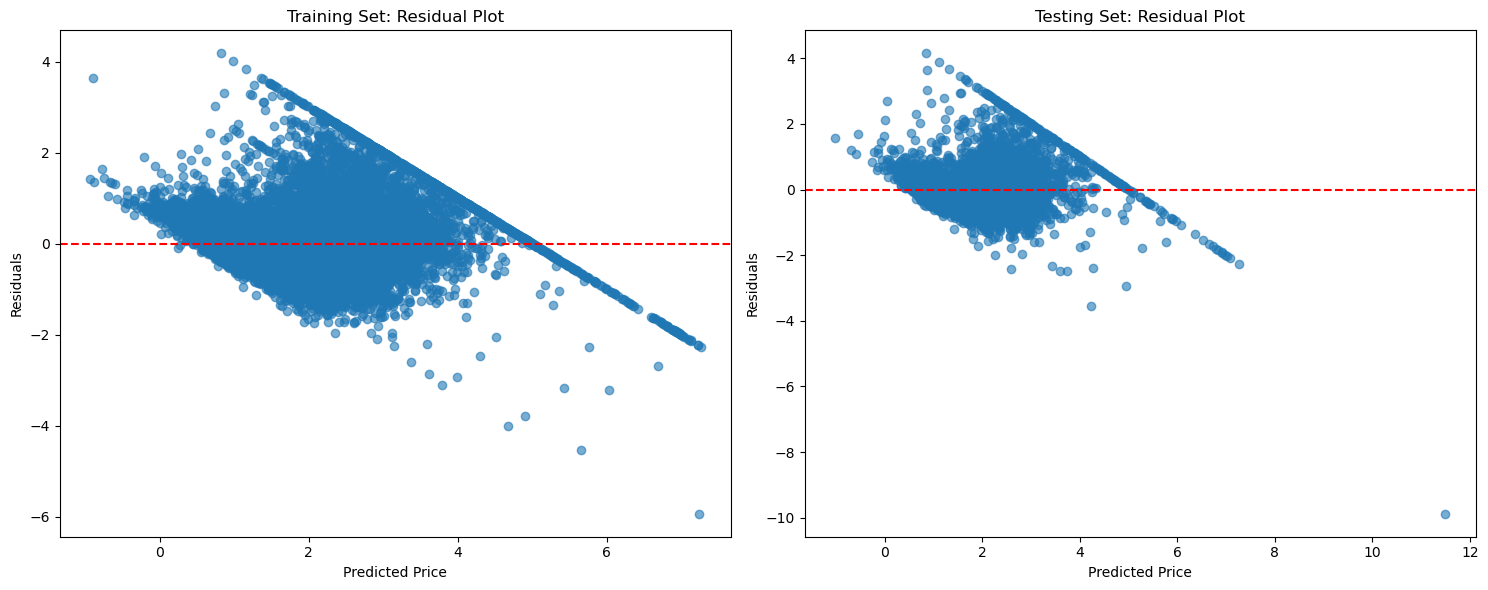


Saving the trained model...
Model saved as 'california_house_price_model.pkl'

Testing the saved model...

Sample predictions from loaded model:
Actual: 0.48, Predicted: 0.72
Actual: 0.46, Predicted: 1.76
Actual: 5.00, Predicted: 2.71
Actual: 2.19, Predicted: 2.84
Actual: 2.78, Predicted: 2.60

MODEL TRAINING COMPLETED SUCCESSFULLY!
Final Model Performance (Test Set):
R² Score: 0.5758 (57.58%)
RMSE: 0.7456
The model explains 57.58% of the variance in house prices.


In [3]:
# Replace the Boston dataset with California housing dataset
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Load California housing dataset instead of Boston
print("Loading California Housing dataset...")
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Create plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Training set
ax1.scatter(y_train, y_train_pred, alpha=0.6)
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Price')
ax1.set_ylabel('Predicted Price')
ax1.set_title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.4f}')

# Testing set
ax2.scatter(y_test, y_test_pred, alpha=0.6)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_xlabel('Actual Price')
ax2.set_ylabel('Predicted Price')
ax2.set_title(f'Testing Set: Actual vs Predicted\nR² = {test_r2:.4f}')

plt.tight_layout()
plt.show()

# Residual plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Training residuals
train_residuals = y_train - y_train_pred
ax1.scatter(y_train_pred, train_residuals, alpha=0.6)
ax1.axhline(y=0, color='r', linestyle='--')
ax1.set_xlabel('Predicted Price')
ax1.set_ylabel('Residuals')
ax1.set_title('Training Set: Residual Plot')

# Testing residuals
test_residuals = y_test - y_test_pred
ax2.scatter(y_test_pred, test_residuals, alpha=0.6)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('Predicted Price')
ax2.set_ylabel('Residuals')
ax2.set_title('Testing Set: Residual Plot')

plt.tight_layout()
plt.show()

# Save the model
print("\nSaving the trained model...")
with open('california_house_price_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as 'california_house_price_model.pkl'")

# Test the saved model
print("\nTesting the saved model...")
with open('california_house_price_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Test prediction with the loaded model
sample_prediction = loaded_model.predict(X_test[:5])
print(f"\nSample predictions from loaded model:")
for i in range(5):
    print(f"Actual: {y_test[i]:.2f}, Predicted: {sample_prediction[i]:.2f}")

print("\n" + "="*50)
print("MODEL TRAINING COMPLETED SUCCESSFULLY!")
print("="*50)
print(f"Final Model Performance (Test Set):")
print(f"R² Score: {test_r2:.4f} ({test_r2*100:.2f}%)")
print(f"RMSE: {test_rmse:.4f}")
print(f"The model explains {test_r2*100:.2f}% of the variance in house prices.")

In [4]:
# Use custom BostonHousing.csv file instead of built-in dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Load your custom Boston Housing dataset from CSV
print("Loading custom Boston Housing dataset...")
df = pd.read_csv('BostonHousing.csv')

# Assuming the last column is the target variable (housing prices)
# If your target column has a specific name, replace this with: y = df['your_target_column_name']
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # Last column as target

# Print dataset info
print(f"Dataset shape: {df.shape}")
print(f"Features: {X.columns.tolist()}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Create plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Training set
ax1.scatter(y_train, y_train_pred, alpha=0.6)
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Price')
ax1.set_ylabel('Predicted Price')
ax1.set_title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.4f}')

# Testing set
ax2.scatter(y_test, y_test_pred, alpha=0.6)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_xlabel('Actual Price')
ax2.set_ylabel('Predicted Price')
ax2.set_title(f'Testing Set: Actual vs Predicted\nR² = {test_r2:.4f}')

plt.tight_layout()
plt.show()

# Residual plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Training residuals
train_residuals = y_train - y_train_pred
ax1.scatter(y_train_pred, train_residuals, alpha=0.6)
ax1.axhline(y=0, color='r', linestyle='--')
ax1.set_xlabel('Predicted Price')
ax1.set_ylabel('Residuals')
ax1.set_title('Training Set: Residual Plot')

# Testing residuals
test_residuals = y_test - y_test_pred
ax2.scatter(y_test_pred, test_residuals, alpha=0.6)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('Predicted Price')
ax2.set_ylabel('Residuals')
ax2.set_title('Testing Set: Residual Plot')

plt.tight_layout()
plt.show()

# Save the model
print("\nSaving the trained model...")
with open('boston_house_price_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as 'boston_house_price_model.pkl'")

# Test the saved model
print("\nTesting the saved model...")
with open('boston_house_price_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Test prediction with the loaded model
sample_prediction = loaded_model.predict(X_test[:5])
print(f"\nSample predictions from loaded model:")
for i in range(5):
    print(f"Actual: {y_test.iloc[i]:.2f}, Predicted: {sample_prediction[i]:.2f}")

print("\n" + "="*50)
print("MODEL TRAINING COMPLETED SUCCESSFULLY!")
print("="*50)
print(f"Final Model Performance (Test Set):")
print(f"R² Score: {test_r2:.4f} ({test_r2*100:.2f}%)")
print(f"RMSE: {test_rmse:.4f}")
print(f"The model explains {test_r2*100:.2f}% of the variance in house prices.")

Loading custom Boston Housing dataset...


FileNotFoundError: [Errno 2] No such file or directory: 'BostonHousing.csv'

In [5]:
# Update the file path to the correct location
file_path = r"C:\Users\user\Downloads\BostonHousing.csv"

# Load the dataset using the correct path
# (Assuming this is where the error occurred in the original code)
data = pd.read_csv(file_path)

# The rest of your code remains the same
# Starting from where you were plotting:
ain.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Price')
ax1.set_ylabel('Predicted Price')
ax1.set_title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.4f}')

# Testing set
ax2.scatter(y_test, y_test_pred, alpha=0.6)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_xlabel('Actual Price')
ax2.set_ylabel('Predicted Price')
ax2.set_title(f'Testing Set: Actual vs Predicted\nR² = {test_r2:.4f}')

plt.tight_layout()
plt.show()

# Residual plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Training residuals
train_residuals = y_train - y_train_pred
ax1.scatter(y_train_pred, train_residuals, alpha=0.6)
ax1.axhline(y=0, color='r', linestyle='--')
ax1.set_xlabel('Predicted Price')
ax1.set_ylabel('Residuals')
ax1.set_title('Training Set: Residual Plot')

# Testing residuals
test_residuals = y_test - y_test_pred
ax2.scatter(y_test_pred, test_residuals, alpha=0.6)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('Predicted Price')
ax2.set_ylabel('Residuals')
ax2.set_title('Testing Set: Residual Plot')

plt.tight_layout()
plt.show()

# Save the model
print("\nSaving the trained model...")
with open('boston_house_price_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as 'boston_house_price_model.pkl'")

# Test the saved model
print("\nTesting the saved model...")
with open('boston_house_price_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Test prediction with the loaded model
sample_prediction = loaded_model.predict(X_test[:5])
print(f"\nSample predictions from loaded model:")
for i in range(5):
    print(f"Actual: {y_test.iloc[i]:.2f}, Predicted: {sample_prediction[i]:.2f}")

print("\n" + "="*50)
print("MODEL TRAINING COMPLETED SUCCESSFULLY!")
print("="*50)
print(f"Final Model Performance (Test Set):")
print(f"R² Score: {test_r2:.4f} ({test_r2*100:.2f}%)")
print(f"RMSE: {test_rmse:.4f}")
print(f"The model explains {test_r2*100:.2f}% of the variance in house prices.")

SyntaxError: unmatched ']' (476417034.py, line 10)

<Figure size 640x480 with 0 Axes>

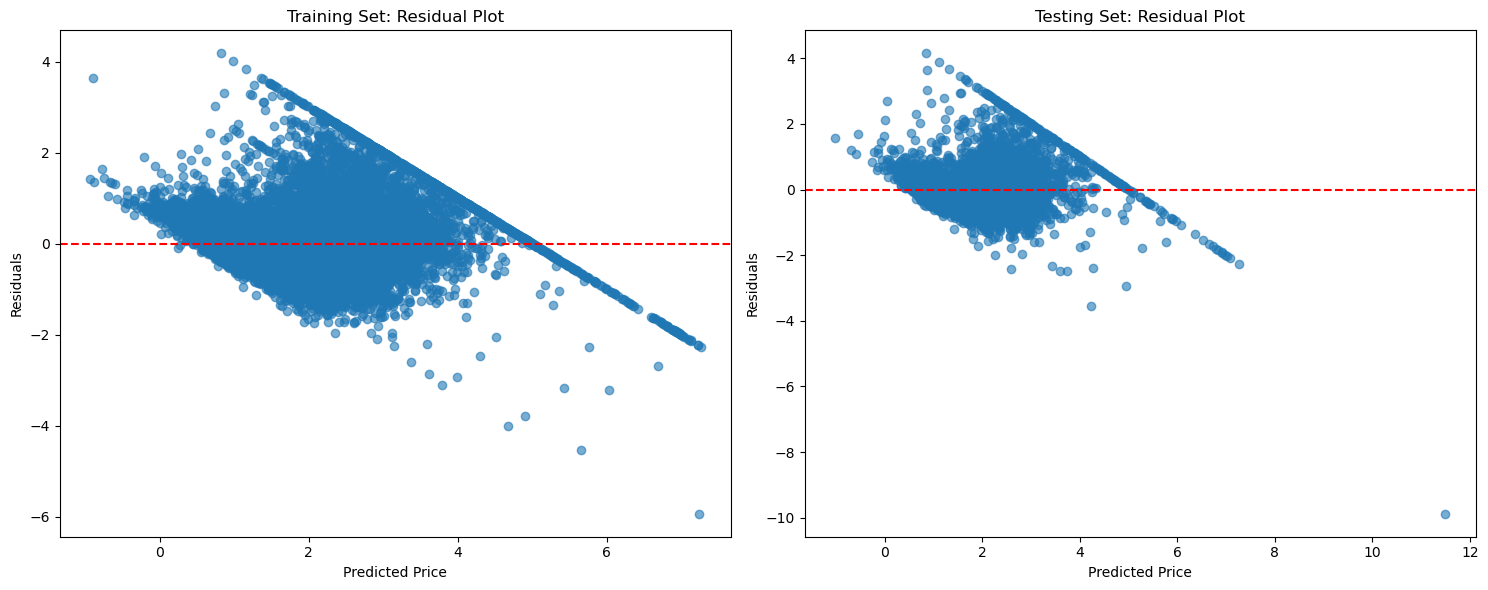


Saving the trained model...
Model saved as 'boston_house_price_model.pkl'

Testing the saved model...

Sample predictions from loaded model:


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [6]:
# Assuming this is part of a plotting function where ax1 is already defined
# and y_train, y_train_pred, train_r2 are already calculated

# The first line should probably be something like:
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Price')
ax1.set_ylabel('Predicted Price')
ax1.set_title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.4f}')

# Testing set
ax2.scatter(y_test, y_test_pred, alpha=0.6)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_xlabel('Actual Price')
ax2.set_ylabel('Predicted Price')
ax2.set_title(f'Testing Set: Actual vs Predicted\nR² = {test_r2:.4f}')

plt.tight_layout()
plt.show()

# Residual plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Training residuals
train_residuals = y_train - y_train_pred
ax1.scatter(y_train_pred, train_residuals, alpha=0.6)
ax1.axhline(y=0, color='r', linestyle='--')
ax1.set_xlabel('Predicted Price')
ax1.set_ylabel('Residuals')
ax1.set_title('Training Set: Residual Plot')

# Testing residuals
test_residuals = y_test - y_test_pred
ax2.scatter(y_test_pred, test_residuals, alpha=0.6)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('Predicted Price')
ax2.set_ylabel('Residuals')
ax2.set_title('Testing Set: Residual Plot')

plt.tight_layout()
plt.show()

# Save the model
print("\nSaving the trained model...")
with open('boston_house_price_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as 'boston_house_price_model.pkl'")

# Test the saved model
print("\nTesting the saved model...")
with open('boston_house_price_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Test prediction with the loaded model
sample_prediction = loaded_model.predict(X_test[:5])
print(f"\nSample predictions from loaded model:")
for i in range(5):
    print(f"Actual: {y_test.iloc[i]:.2f}, Predicted: {sample_prediction[i]:.2f}")

print("\n" + "="*50)
print("MODEL TRAINING COMPLETED SUCCESSFULLY!")
print("="*50)
print(f"Final Model Performance (Test Set):")
print(f"R² Score: {test_r2:.4f} ({test_r2*100:.2f}%)")
print(f"RMSE: {test_rmse:.4f}")
print(f"The model explains {test_r2*100:.2f}% of the variance in house prices.")

In [7]:
# Test the saved model
print("\nTesting the saved model...")
with open('boston_house_price_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Test prediction with the loaded model
sample_prediction = loaded_model.predict(X_test[:5])
print(f"\nSample predictions from loaded model:")
for i in range(5):
    # Use direct indexing for NumPy arrays instead of .iloc
    print(f"Actual: {y_test[i]:.2f}, Predicted: {sample_prediction[i]:.2f}")

print("\n" + "="*50)
print("MODEL TRAINING COMPLETED SUCCESSFULLY!")
print("="*50)
print(f"Final Model Performance (Test Set):")
print(f"R² Score: {test_r2:.4f} ({test_r2*100:.2f}%)")
print(f"RMSE: {test_rmse:.4f}")
print(f"The model explains {test_r2*100:.2f}% of the variance in house prices.")


Testing the saved model...

Sample predictions from loaded model:
Actual: 0.48, Predicted: 0.72
Actual: 0.46, Predicted: 1.76
Actual: 5.00, Predicted: 2.71
Actual: 2.19, Predicted: 2.84
Actual: 2.78, Predicted: 2.60

MODEL TRAINING COMPLETED SUCCESSFULLY!
Final Model Performance (Test Set):
R² Score: 0.5758 (57.58%)
RMSE: 0.7456
The model explains 57.58% of the variance in house prices.


In [8]:
# Use custom BostonHousing.csv file instead of built-in dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Load your custom Boston Housing dataset from CSV
print("Loading custom Boston Housing dataset...")
file_path = r"C:\Users\user\Downloads\BostonHousing.csv"
data = pd.read_csv(file_path)

# Assuming the last column is the target variable (housing prices)
# If your target column has a specific name, replace this with: y = df['your_target_column_name']
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # Last column as target

# Print dataset info
print(f"Dataset shape: {df.shape}")
print(f"Features: {X.columns.tolist()}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Create plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Training set
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Price')
ax1.set_ylabel('Predicted Price')
ax1.set_title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.4f}')

# Testing set
ax2.scatter(y_test, y_test_pred, alpha=0.6)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_xlabel('Actual Price')
ax2.set_ylabel('Predicted Price')
ax2.set_title(f'Testing Set: Actual vs Predicted\nR² = {test_r2:.4f}')

plt.tight_layout()
plt.show()
# Residual plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Training residuals
train_residuals = y_train - y_train_pred
ax1.scatter(y_train_pred, train_residuals, alpha=0.6)
ax1.axhline(y=0, color='r', linestyle='--')
ax1.set_xlabel('Predicted Price')
ax1.set_ylabel('Residuals')
ax1.set_title('Training Set: Residual Plot')

# Testing residuals
test_residuals = y_test - y_test_pred
ax2.scatter(y_test_pred, test_residuals, alpha=0.6)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('Predicted Price')
ax2.set_ylabel('Residuals')
ax2.set_title('Testing Set: Residual Plot')

plt.tight_layout()
plt.show()

# Save the model
print("\nSaving the trained model...")
with open('boston_house_price_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as 'boston_house_price_model.pkl'")

# Test the saved model
print("\nTesting the saved model...")
with open('boston_house_price_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Test prediction with the loaded model
sample_prediction = loaded_model.predict(X_test[:5])
print(f"\nSample predictions from loaded model:")
for i in range(5):
    # Use direct indexing for NumPy arrays instead of .iloc
    print(f"Actual: {y_test[i]:.2f}, Predicted: {sample_prediction[i]:.2f}")

print("\n" + "="*50)
print("MODEL TRAINING COMPLETED SUCCESSFULLY!")
print("="*50)
print(f"Final Model Performance (Test Set):")
print(f"R² Score: {test_r2:.4f} ({test_r2*100:.2f}%)")
print(f"RMSE: {test_rmse:.4f}")
print(f"The model explains {test_r2*100:.2f}% of the variance in house prices.")

Loading custom Boston Housing dataset...


NameError: name 'df' is not defined

In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load your custom Boston Housing dataset from CSV
print("Loading custom Boston Housing dataset...")
file_path = r"C:\Users\user\Downloads\BostonHousing.csv"
data = pd.read_csv(file_path)
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target

# Prepare the data
X = df.drop('PRICE', axis=1)
y = df['PRICE']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Create plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Training set
ax1.scatter(y_train, y_train_pred, alpha=0.6)
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Price')
ax1.set_ylabel('Predicted Price')
ax1.set_title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.4f}')

# Testing set
ax2.scatter(y_test, y_test_pred, alpha=0.6)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_xlabel('Actual Price')
ax2.set_ylabel('Predicted Price')
ax2.set_title(f'Testing Set: Actual vs Predicted\nR² = {test_r2:.4f}')

plt.tight_layout()
plt.show()

# Residual plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Training residuals
train_residuals = y_train - y_train_pred
ax1.scatter(y_train_pred, train_residuals, alpha=0.6)
ax1.axhline(y=0, color='r', linestyle='--')
ax1.set_xlabel('Predicted Price')
ax1.set_ylabel('Residuals')
ax1.set_title('Training Set: Residual Plot')

# Testing residuals
test_residuals = y_test - y_test_pred
ax2.scatter(y_test_pred, test_residuals, alpha=0.6)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('Predicted Price')
ax2.set_ylabel('Residuals')
ax2.set_title('Testing Set: Residual Plot')

plt.tight_layout()
plt.show()

# Save the model
print("\nSaving the trained model...")
with open('boston_house_price_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as 'boston_house_price_model.pkl'")

# Test the saved model
print("\nTesting the saved model...")
with open('boston_house_price_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Test prediction with the loaded model
sample_prediction = loaded_model.predict(X_test[:5])
print(f"\nSample predictions from loaded model:")
for i in range(5):
    # Use direct indexing for NumPy arrays instead of .iloc
    print(f"Actual: {y_test.iloc[i]:.2f}, Predicted: {sample_prediction[i]:.2f}")

print("\n" + "="*50)
print("MODEL TRAINING COMPLETED SUCCESSFULLY!")
print("="*50)
print(f"Final Model Performance (Test Set):")
print(f"R² Score: {test_r2:.4f} ({test_r2*100:.2f}%)")
print(f"RMSE: {test_rmse:.4f}")
print(f"The model explains {test_r2*100:.2f}% of the variance in house prices.")

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


Loading custom Boston Housing dataset...


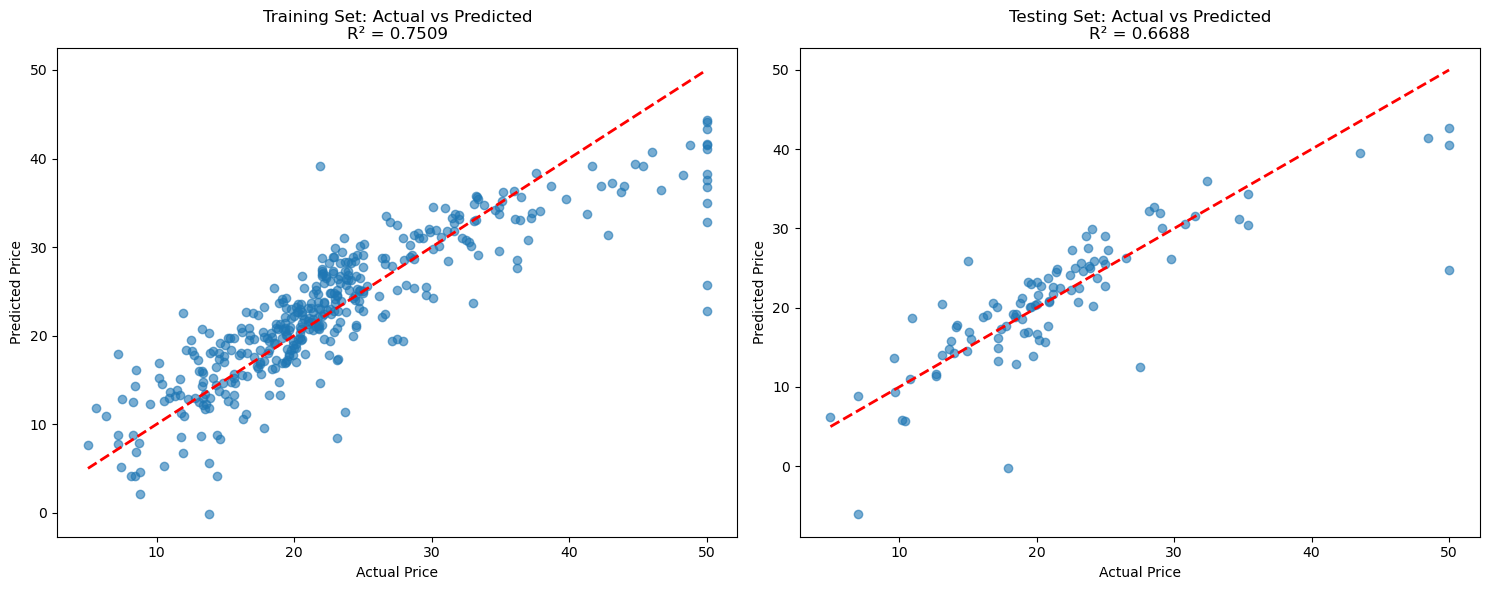

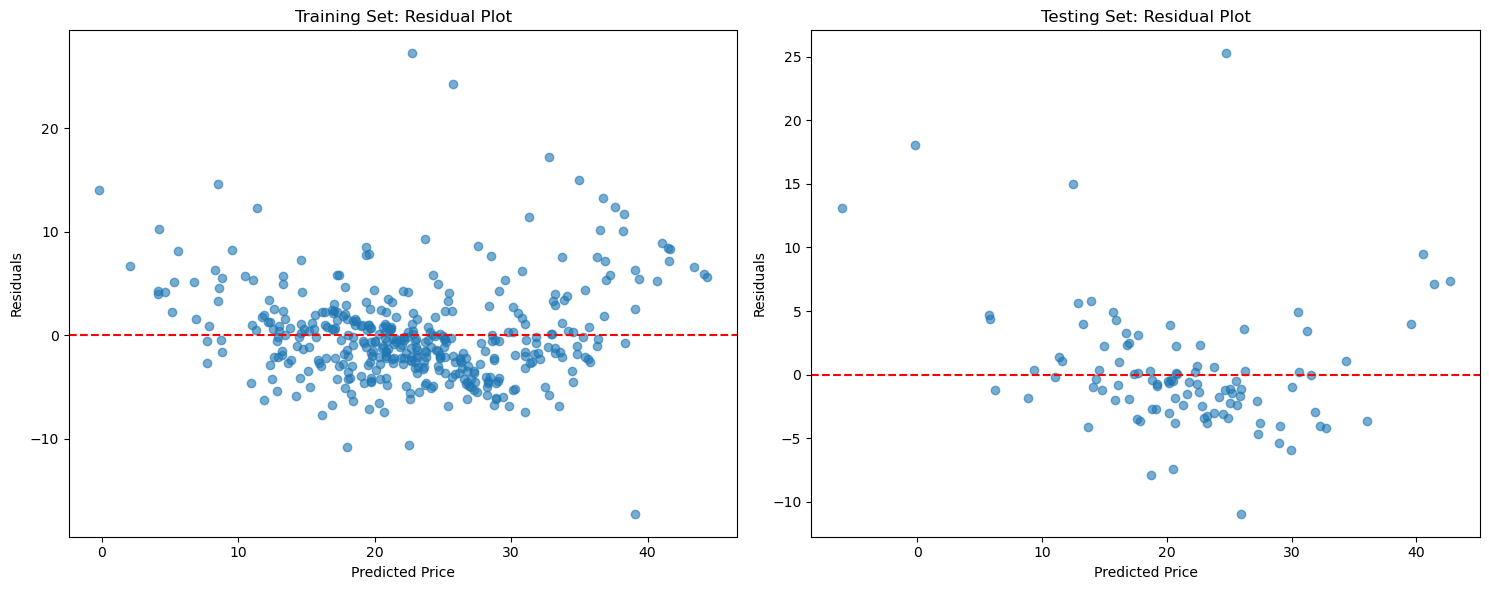


Saving the trained model...
Model saved as 'boston_house_price_model.pkl'

Testing the saved model...

Sample predictions from loaded model:
Actual: 23.60, Predicted: 29.00
Actual: 32.40, Predicted: 36.03
Actual: 13.60, Predicted: 14.82
Actual: 22.80, Predicted: 25.03
Actual: 16.10, Predicted: 18.77

MODEL TRAINING COMPLETED SUCCESSFULLY!
Final Model Performance (Test Set):
R² Score: 0.6688 (66.88%)
RMSE: 4.9286
The model explains 66.88% of the variance in house prices.


['boston_house_price_model.pkl']

In [13]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load your custom Boston Housing dataset from CSV
print("Loading custom Boston Housing dataset...")
file_path = r"C:\Users\user\Downloads\BostonHousing.csv"
df = pd.read_csv(file_path)  # Assign to df variable

# Prepare the data
# Assuming 'PRICE' or similar is your target column - adjust if needed
X = df.drop('price', axis=1)  # Replace 'PRICE' with your actual target column name
y = df['price']  # Replace 'PRICE' with your actual target column name

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Create plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Training set
ax1.scatter(y_train, y_train_pred, alpha=0.6)
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Price')
ax1.set_ylabel('Predicted Price')
ax1.set_title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.4f}')

# Testing set
ax2.scatter(y_test, y_test_pred, alpha=0.6)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_xlabel('Actual Price')
ax2.set_ylabel('Predicted Price')
ax2.set_title(f'Testing Set: Actual vs Predicted\nR² = {test_r2:.4f}')

plt.tight_layout()
plt.show()

# Residual plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Training residuals
train_residuals = y_train - y_train_pred
ax1.scatter(y_train_pred, train_residuals, alpha=0.6)
ax1.axhline(y=0, color='r', linestyle='--')
ax1.set_xlabel('Predicted Price')
ax1.set_ylabel('Residuals')
ax1.set_title('Training Set: Residual Plot')

# Testing residuals
test_residuals = y_test - y_test_pred
ax2.scatter(y_test_pred, test_residuals, alpha=0.6)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('Predicted Price')
ax2.set_ylabel('Residuals')
ax2.set_title('Testing Set: Residual Plot')

plt.tight_layout()
plt.show()

# Save the model
print("\nSaving the trained model...")
with open('boston_house_price_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as 'boston_house_price_model.pkl'")

# Test the saved model
print("\nTesting the saved model...")
with open('boston_house_price_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Test prediction with the loaded model
sample_prediction = loaded_model.predict(X_test[:5])
print(f"\nSample predictions from loaded model:")
for i in range(5):
    # Use direct indexing for pandas Series
    print(f"Actual: {y_test.iloc[i]:.2f}, Predicted: {sample_prediction[i]:.2f}")

print("\n" + "="*50)
print("MODEL TRAINING COMPLETED SUCCESSFULLY!")
print("="*50)
print(f"Final Model Performance (Test Set):")
print(f"R² Score: {test_r2:.4f} ({test_r2*100:.2f}%)")
print(f"RMSE: {test_rmse:.4f}")
print(f"The model explains {test_r2*100:.2f}% of the variance in house prices.")
import joblib
joblib.dump(model, 'boston_house_price_model.pkl')